# Infering a Gaussian Mixture
## <font color='red'> Assumption: The underlying distributions are described by the data completely. Number of clusters is known. </font>
### <font color='red'> After convergence the mixing coefficients are determined by the relative cluster sizes and the mean and covariance matrices are the statistics of the clusters. </font>

### Import modules

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from sklearn import mixture

### Load data

In [2]:
npzfile = np.load('GaussianMixture.npz')
print(sorted(npzfile.files))

['mixing_idx', 'x_sample', 'y_sample']


### Plot data
The information which component generated which sample is deliberately not plotted.

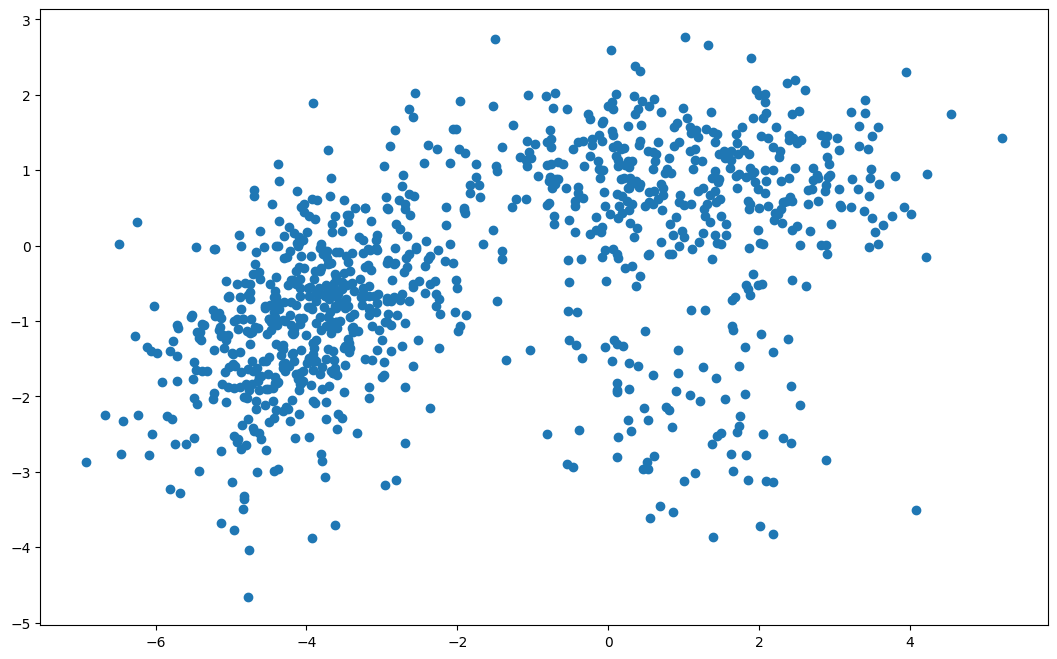

In [3]:
x_sample = npzfile['x_sample']
y_sample = npzfile['y_sample']
fig = plt.figure(figsize=(13,8))
plt.scatter(x_sample, y_sample)
plt.show()

## Gaussian Mixture Model
The data was generated mixing three normal distributions,
\begin{equation}
\mathcal{N}\left( \left( 1 \atop 1 \right), \left( 2 \atop 0 \right. \left. 0 \atop 0.5 \right) \right), \mathcal{N}\left( \left( {-4} \atop {-1} \right), \left( 1 \atop 0.5 \right. \left. 0.5 \atop 1 \right) \right), \mathcal{N}\left( \left( 1 \atop {-2} \right), \left( 1 \atop 0 \right. \left. 0 \atop 1 \right) \right).
\end{equation}
with mixing coefficients 0.25, 0.5 and 0.25.

### 3 Components

Setting the number of components to 3, the Gaussian mixture model returns as estimates.

In [4]:
n_components = 3
gmm = mixture.GaussianMixture(n_components=n_components, covariance_type='full')
data = np.stack((x_sample, y_sample)).T
gmm.fit(data)
print('Mixing coefficients: ', gmm.weights_, '\n')
for idx in range(0, n_components):
    print('Component', idx+1)
    print('Mean:', gmm.means_[idx])
    print('Covariance:', gmm.covariances_[idx], '\n')

Mixing coefficients:  [0.33417749 0.53917808 0.12664443] 

Component 1
Mean: [1.01131955 0.99067622]
Covariance: [[ 2.40733201 -0.07463251]
 [-0.07463251  0.35997057]] 

Component 2
Mean: [-3.96869421 -0.9868105 ]
Covariance: [[0.95624216 0.42431302]
 [0.42431302 0.98355906]] 

Component 3
Mean: [ 0.94024529 -1.31590142]
Covariance: [[ 1.04307922 -0.21987633]
 [-0.21987633  1.95503875]] 



#### Plot data
First coloured by cluster assignments.

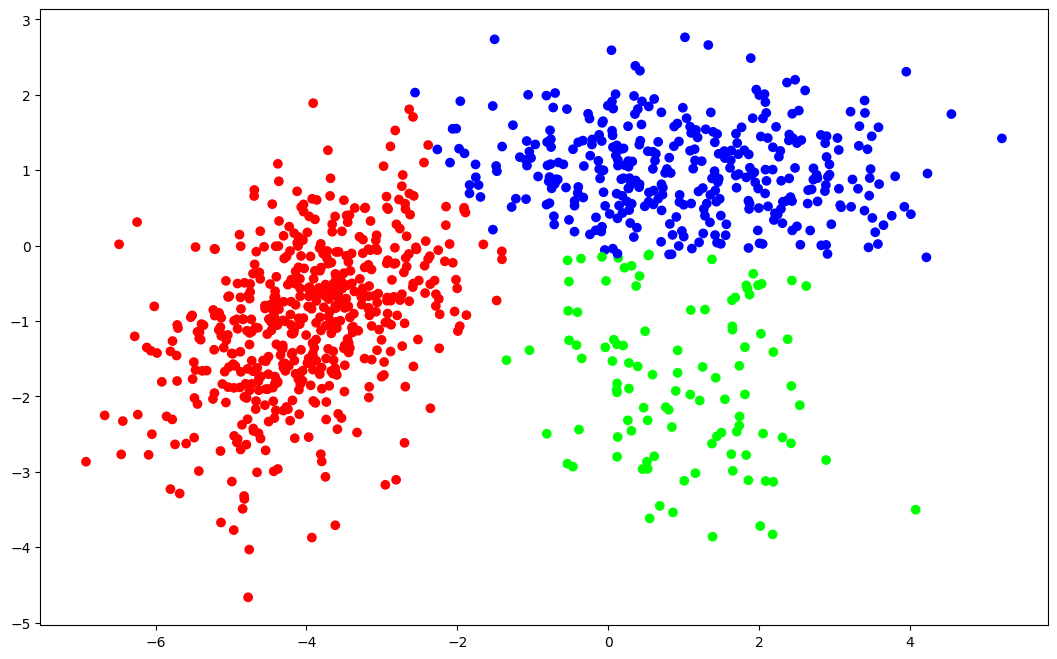

In [5]:
mixing_idx = gmm.predict(data)
fig = plt.figure(figsize=(13,8))
plt.scatter(x_sample, y_sample, c = mixing_idx, cmap = plt.cm.brg)
plt.show()

We can plot the data giving each sample a colour mixed from red, green and blue according to the posterior probabilities, also known as responsibilities.

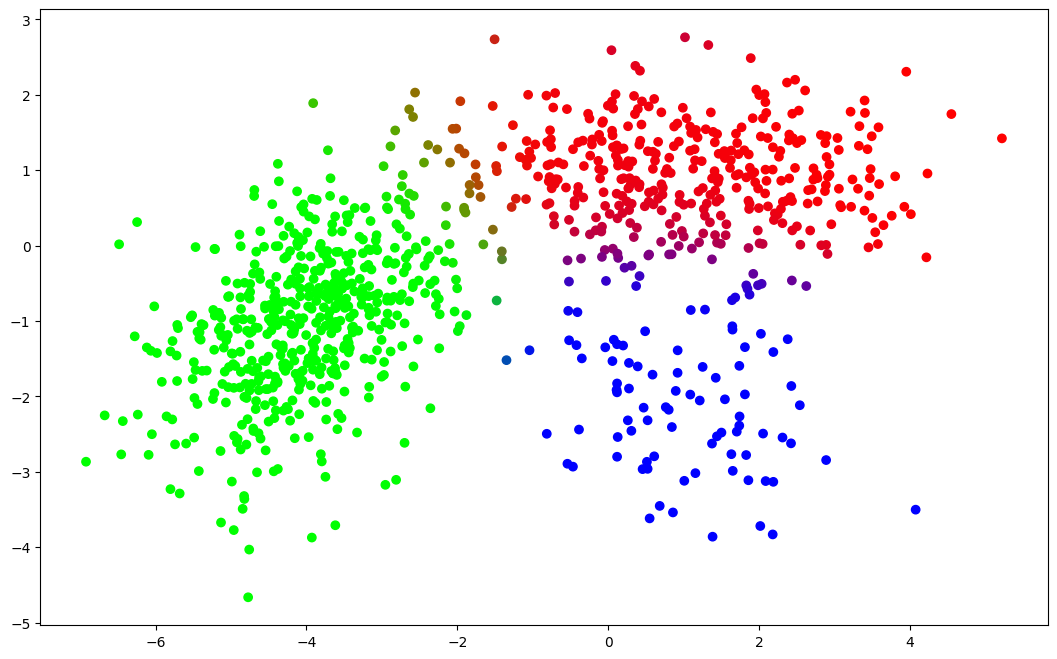

In [6]:
mixing_prob = gmm.predict_proba(data)
fig = plt.figure(figsize=(13,8))
plt.scatter(x_sample, y_sample, c = mixing_prob)
plt.show()

### 2 Components

Setting the number of components to 2, the Gaussian mixture model returns as estimates.

In [7]:
n_components = 2
gmm = mixture.GaussianMixture(n_components=n_components, covariance_type='full')
data = np.stack((x_sample, y_sample)).T
gmm.fit(data)
print('Mixing coefficients: ', gmm.weights_, '\n')
for idx in range(0, n_components):
    print('Component', idx+1)
    print('Mean:', gmm.means_[idx])
    print('Covariance:', gmm.covariances_[idx], '\n')

Mixing coefficients:  [0.54556591 0.45443409] 

Component 1
Mean: [-3.94618556 -0.94684191]
Covariance: [[0.99524832 0.49311713]
 [0.49311713 1.0579891 ]] 

Component 2
Mean: [1.03449208 0.3276783 ]
Covariance: [[1.92149739 0.00921313]
 [0.00921313 1.88238821]] 



We can plot the data giving each sample a colour mixed from red and green according to the posterior probabilities, also known as responsibilities.

(1000, 2)


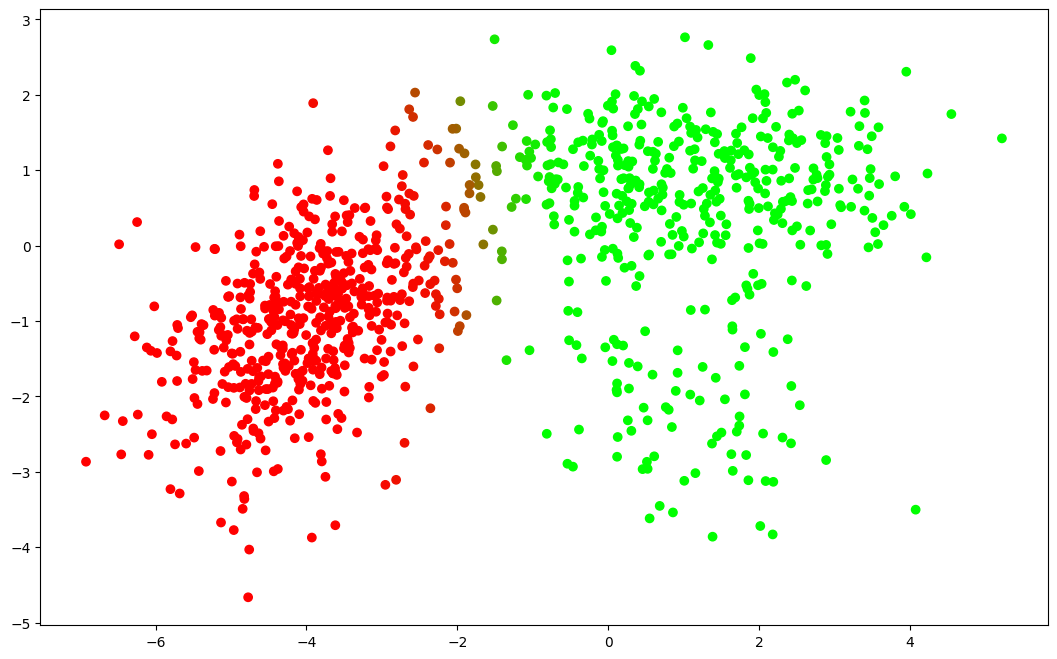

In [8]:
mixing_prob = gmm.predict_proba(data)
print(mixing_prob.shape)
c = np.concatenate((mixing_prob, np.zeros((mixing_prob.shape[0],1))),1 )
fig = plt.figure(figsize=(13,8))
plt.scatter(x_sample, y_sample, c = c)
plt.show()

### <font color='red'> Needed: More flexibility with regards to mixing coefficients, distributions and number of clusters. </font>
### <font color='red'> => Distributions of distributions build in uncertainty of unseen data.</font>